<a href="https://colab.research.google.com/github/KaissonFerreira/Projeto_SeP500_Financial_Actions/blob/main/Jupyter_notebook/project_S%26P500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

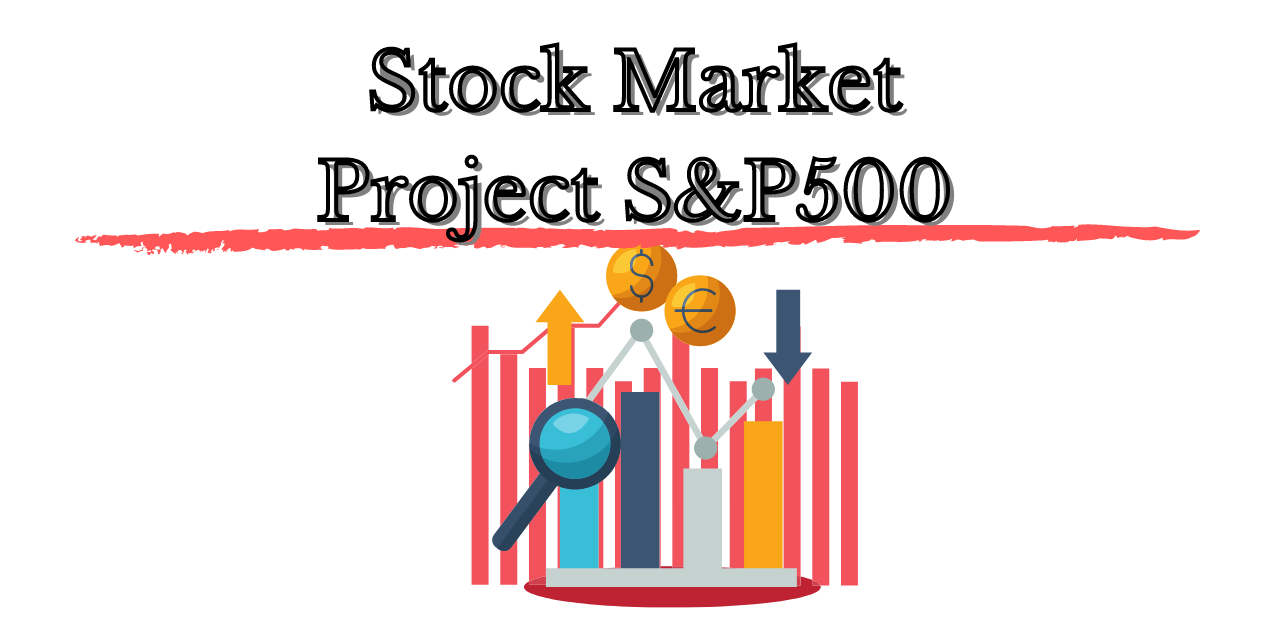

#**S&P 500 - (banco de dados retirados do Kaggle)**
https://www.kaggle.com/paytonfisher/sp-500-companies-with-financial-information


---

##Contexto de negócio##


---


  O S&P 500 é um índice ponderado por capitalização das **500 maiores empresas de capital aberto** dos Estados Unidos. Esse índice é útil para estudar porque geralmente reflete a saúde de todo o mercado de ações dos Estados Unidos. 

  No banco de dados proposto, podemos encontrar alguns dos principais indicadores para investir em uma empresa. Assim, um dos objetivos desse projeto é **analisar as empresas que possuem maiores chances de valorização em suas ações** dentro do S&P500. Entretanto, vale ressaltar que por si só, esses indicadores não são suficientes para ter um alto grau de confiabilidade a longo prazo, mas é possível retirar alguns insight que possam **auxiliar** na tomada de decisão do investidor, para assim escolher em qual ação investir.

  Para analisar uma determinada ação de uma empresa e verificar se vale a pena investir nela, há dois métodos de avaliação. O primeiro deles é a **análise fundamentalista**, que tem por objetivo obter lucros no investimento a médio e longo prazo, e a **análise técnica**, que tem por objetivo obter ganhos financeiros a curto prazo, e, que de modo simplório, esse tipo de análise tem como foco os padrões e movimentações das ações por meio de gráficos.

  Esse projeto aborda uma análise fundamentalista, mediante aos tipos de dados oferecidos. Esse tipo de análise consiste em fundamentos quantitativos e qualitativos, sendo eles:

* **Fundamentos quantitativos**: São aqueles que são medidos em números **(os 
dados do projetos estão inseridos nessa categoria)**.

* **Fundamentos qualitativos**: São fatores internos e externos que podem contribuir com a rentabilidade e crescimento da empresa, favorencendo seus ganhos financeiros, mas que também podem levar uma empresa ao prejuízo, e consequentemente, aos acionistas.






#**Cumprimento de alguns requisitos para geração de Insights**
Categorizando as empresas por setores, temos que:
* Identificar quais são os setores que tem uma maior lucrativade;
* Identificar quais são os setores que tem um maior retorno de dividendos para os acionistas;
* Identificar quais são os setores mais valiosos no mercado (Market cap);

Analisando as empresas dos principais setores, temos que: 

* Identificar quais são as melhores empresas para se investir em cada setor, analisando o P/E e o dividendo Yeld;
* Analisar o Market Cap (capitalização de mercado) das empresas escolhidas;
* Analisar o número de ações de cada empresa;
* Identificar quais empresas apresentam uma melhor gestão operacional de caixa, sem atribuir os efeitos financeiros e de impostos; (Analisar o EBITDA)
* Identificar quais são as empresas que demonstram um maior potencial de crescimentos; (Analisar o Prices/book)

#**Passo a passo de um projeto de dados** :



1.   Entendimento da área/empresa
2.   Entendimento do desafio
3.   Extração/Obtenção de dados
4.   Ajuste de dados (tratamento/limpeza)
5.   Análise exploratória
6.   Modelagem + algorítmos (modelos de machine learning)
7.   Avaliação do modelo
7.   Interpretação dos resultados

## **Import**


Importando algumas bibliotecas que serão utilizadas no projeto:


In [ ]:
# Bibliotecas para visualização dos dados: 
import pandas as pd
import plotly.express as px # Biblioteca interessante para uma análise mais detalhada dentro das figuras, tipo um Dashboard.
import plotly.graph_objects as go 



## **Extração e tratamento**

Importando a base de dados e verificando se há elementos faltantes.

In [ ]:
url = 'https://github.com/KaissonFerreira/Projeto_SeP500_Financial_Actions/raw/main/financials.csv'
df=pd.read_csv(url)
#Soma dos elementos faltantes em cada atributo (coluna)
print(df.isnull().sum()) 
# Renomeando algumas colunas
df=df.rename(columns={'Price/Earnings':'P/E','Dividend Yield':'DY','Earnings/Share':'E/S','Price/Sales':'P/S','Price/Book':'P/B'})
df.info()

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
SEC Filings       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Symbol        505 non-null    object 
 1   Name          505 non-null    object 
 2   Sector        505 non-null    object 
 3   Price         505 non-null    float64
 4   P/E           503 non-null    float64
 5   DY            505 non-null    float64
 6   E/S           505 non-null    float64
 7   52 Week Low   505 non-null    float64
 8   52 Week High  505 non-null    float64
 9   Market Cap    505 non-null    float64
 10  EBITDA        505 non-null    float64
 11  P/S           505 non-null    float64


Observa-se que há alguns elementos vazios no indicador P/E (Price/Earnings ou preço da ação pelo lucro). Então podemos calcular as células faltantes pela razão entre os dados da coluna Price (Preço da ação) e da coluna E/S (Earnings/Shere ou lucro por ação).

In [ ]:
df['P/E'].fillna(df['Price']/df['E/S'], inplace=True)
print(df['P/E'].isnull().sum()) #Verificando se de fato foram preenchidos os dados faltante na coluna Price/Earnings.

0


Os elementos vazios presentes na coluna P/B (Price/Book ou preço sobre valor patrimonial) não serão tratados no momento. Quando ocorrer as análises sobre esse indicador, poderemos afirmar de qual maneira ele poderá ser tratado.
Desse modo, terminamos a parte de tratamento e limpeza dos dados.

##**Análise Exploratória**


---



---


Na análise exploratória, poderemos retirar alguns dos insights propostos no inicio desse projeto. Para isso, será dividido em dois segmentos, um caracterizado pela análise entre setores e o outro carcterizado pela análise de empresas do mesmo setor (diga-se por passagem, que é uma análise bem mais conveniente).

###**Comparação de alguns indicadores entre o mesmo setor**


---
Nesta seção, será feita apenas uma análise superficial de 3 indicadores (DY - Rendimento de dividendos, P/E - Preço da ação por lucro e Market Cup - Que significa a capitalização de recursos) por setor. Apesar de que a comparação entre setores não ser tão interessante na análise fundamentalista, pode-se observar algumas tendências para a escolha de algum setor, e por fim analisar e comparar os indicadores das empresas daquele setor.

**Analisando a quantidade empresas por setor:**

In [ ]:
df['Sector'].value_counts()


Consumer Discretionary        84
Information Technology        70
Financials                    68
Industrials                   67
Health Care                   61
Consumer Staples              34
Real Estate                   33
Energy                        32
Utilities                     28
Materials                     25
Telecommunication Services     3
Name: Sector, dtype: int64

In [ ]:
# A escolha do grafico de barras foi escolhido para demonstrar com maior clareza.
fig1 = px.bar(df,x='Sector',color= 'Sector', title='Quantidade de empresas por setor', height= 500)
fig1.show()

**Analisando os rendimentos de dividendos de cada setor:**

In [ ]:
#plt.figure(figsize= (25,6))
#plt.title('Boxplot dos rendimentos de dividendos para cada setor')
#ax = sns.boxplot(x='Sector',y='DY',data=df);

In [ ]:
#  O gráfico de boxplot foi escolhido para demonstrar uma maior riqueza nos detalhes da estatística descritiva de cada setor, referente ao indicador escolhido.
fig = px.box(df, x= 'Sector',y= 'DY',title= 'Boxplot dos rendimentos de divendendos por setor',notched=False,height=500)
fig.show()


Observa-se que alguns dos setores com menos empresas, como o setor de telecomunicação, o setor de utilidade e o setor de imobiliária, tem os melhores rendimentos de uma maneira geral. Diante disso, poderemos aprofundar um pouco mais nesses setores, visando bons dividendos para o investidor.

**Analisando o P/E:**

In [ ]:
fig = px.box(df, x= 'Sector',y= 'P/E',title= 'Boxplot do indicador P/E por setor',notched=False,height=1000, orientation= 'v')
print(fig.show())

None


Quando o indicador P/E está muito elevado, isso demonstra que os investidores estão esperando um maior crescimento dos lucros futuros em comparação com às empresas do mesmo setor que estão com indicador mais baixo, ou pode ser que a ação esteja cara demais. Diante disso, podemos observar que alguns setores como energia e tecnologia da informação, há empresas que podem possuir indícios de potencial crescimento. Assim, isso poderá ser avaliado de forma mais profunda na próxima seção. 

**Analisando o Market Cap:**

In [ ]:
fig = px.histogram(df.sort_values('Market Cap', ascending=False),
                   x='Sector',y='Market Cap', color= 'Sector', 
                   title= 'Histograma do indicador Market Cap em cada setor (medido em Trilhões)',histfunc='sum',
                   width = 1200)
fig.show()

É perceptível que as empresas que mais capitalizam recursos no mercado financeiro é a área de tecnologia, eis um forte motivo para analisar esse setor de forma mais profunda.

###**Comparação dos indicadores entre empresas do mesmo setor**
---
Por ser vários setores envolvidos e com muitos indicadores para analisar, temos que fragmentar o nosso campo de dados. Assim, escolheremos apenas o setor de **Tecnologia da informação** (Esse setor foi escolhido com base de que pode haver empresas que tem um elevado potencial de crescimento)


### **Indicador Price, P/E e Earnings:**


Esses indicadores estão diretamente correlacionados, uma vez que P/E = Price (Preço por ação) / Earnings (Lucro por ação).
Assim, poderemos analisar somente o P/E das empresas de cada setor:

In [ ]:
setor = df['Sector'].unique() # Gravando a lista de setores dentro de uma variável.
setor.sort() # Colocando os nomes dos setores em ordem alfabética
setor


array(['Consumer Discretionary', 'Consumer Staples', 'Energy',
       'Financials', 'Health Care', 'Industrials',
       'Information Technology', 'Materials', 'Real Estate',
       'Telecommunication Services', 'Utilities'], dtype=object)

In [ ]:
a = setor[6] # Identificação do setor de tecnologia
tecnologia = df.query('@a in Sector') # Data frame com apenas as empresas do ramo de tecnologia


In [ ]:
# Imprimindo o gráfico de barras para o setor escolhido (melhor visualização)

fig = px.bar(tecnologia.sort_values('P/E',ascending=False), x= 'Name',y= 'P/E',title= "Gráfico de barras do indicador P/E no setor de '{}'".format(a),height=700,color='P/E', labels= {'P/E':'Price/Earning'})
fig.show()


O índice P/E pode significar o quão cara está uma ação (se vale a pena comprar ou não). Quanto mais elevado for o P/E, mais cara ela está. 
Entrentanto, esse índice é baseado na oferta e procura, logo para empresas do ramo de tecnologia, algumas delas tendem a crescer exponencialmente, e isso faz com que a procura seja grande, encarecendo o valor de uma ação.
Por isso, é preciso observar outros indicadores para verificar se realmente compensa investir naquela ação.

**Alguns pontos levantados nesse gráfico de barras:**

* As empresa SalesForce, Netflix e Advanceds Micro Devis são as empresas com os mais elevados P/E, especialmente a primeira que ultrapassa os 500 pontos. Para saber se vale a pena investir nessas empresas, teremos que observar também o preço e o lucro de cada ação. Isso nos dará algum indicativo de que há chances da empresa crescer futuramente.
* A única empresa com o P/E negativo é a AutoDesk. Mas não quer dizer necessariamente que é um má indicativo.


In [ ]:
#Gráfico de barras para o Price (preço das ações):
fig1 = px.bar(tecnologia.sort_values('Price',ascending=False), x= 'Name',y= 'Price',title= "Gráfico de barras do indicador Price no setor de '{}'".format(a),height=600, color='Price')
fig1.show()

In [ ]:
# Gráfico de barras referente à Earnings (lucro por ação)
fig = px.bar(tecnologia.sort_values('E/S',ascending=False), x= 'Name',y= 'E/S',
             title= "Gráfico de barras do indicador Earnings (Lucro por ação) no setor de '{}'".format(a),
             height=600, color='E/S',labels={'E/S':'Earnings'})
fig.show()

**Interpretação dos resultados até o momento**
* A empresa AMD pode ter retornos consideráveis caso tenha um bom gerenciamento. Mas como não temos o histórico dos múltiplos de valuation da empresa, fica um difícil ter um alto grau de confiabilidade nessas análises explorativas.
* A empresa Netflix e especialmente SalesForce, demonstra também que os indicadores de modos separados são indicativos de potencial crescimento, mas para ter uma melhor análise preditiva, se faz necessário ver a estrutura da empresa e o histórico dos múltiplos do valuation. 

Continuando a nossa análise explorativa, vamos entender um pouco sobre os outros indicadores de cada uma.

### **Indicador Dividend Yeld**


---
Esse indicador serve para mensurar a performance de uma companhia em relação ao pagamento dos seus proventos. Mas nunca deve ser analisado de forma isolada.
Um DY (Dividend yeld - Rendimento dos dividendos) baixo **pode significar** que a empresa retém os lucros para reinvestimento (o que é uma coisa boa). Já um alto DY **pode ser** que a empresa pague altos dividendos para atrair investidores, uma vez que ela pode estar em crise (indício de má gerenciamento).
Por isso, esse indicador, tem que ser analisado com a conjectura e o momento que a empresa está passando.

In [ ]:
tecnologia['Media_DY']=tecnologia['DY'].mean() #Adicionando uma nova coluna da média dos dividendos em todo o setor de tecnologia
tecnologia = tecnologia.sort_values('DY', ascending=False) # Passando a ordem do maior para o menor em relação ao indicador DY

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
x= tecnologia['Name']
y= tecnologia['DY']
y_med = tecnologia['Media_DY']
fig = px.bar(tecnologia,x='Name',y='DY',color='DY',labels={'DY':'Rendimento dos dividendos em dólar'},
             title='Comparação da média do rendimentos de dividendos no setor por cada empresa',
             height=500,width= 2500)
fig.add_scatter(x=x,y=y_med,text='Média dos Dividends Yield no setor',name='Valor médio de DY')
fig.show()

Pode-se observar que o rendimento dos dividendos das 3 empresas citadas anteriormente, são equivalentes à zero. Isso pode significar que a empresa está em expansão, por isso precisa de capital para reinvestimento.
Se isso for consolidado por outros parâmetros que não se encontram nesse banco de dados, como o ROE, ROIC e a estruturação da empresa em si, ou seja, como ela é gerenciada pelos seus adminstradores, essas empresas podem vir a dar muito lucro para os seus investidores. Além disso, se faz necessário levantar o histórico dos indicadores de valuation, para saber se realmente a empresa em questão está em declínio ou ascenção.


###**Analisando os indicadores 52 week low e 52 week high**

---

Esses indicadores analisam o valor mais alto e o mais baixo das ações dentro do período um ano.

In [ ]:
fig = go.Figure()
fig.add_scatter(x=tecnologia['Name'],y=tecnologia['52 Week High'], name='Valor da ação mais baixa',mode='lines+markers')
fig.add_scatter(x=tecnologia['Name'],y=tecnologia['52 Week Low'],name='Valor da ação mais alta',mode='lines+markers')
fig.update_layout(title='Comparação entre o valor mais alto e o mais baixa de cada ação no período de 1 ano',
                  xaxis_title = 'Nome das empresas',
                  yaxis_title='Valor da ação em dólar', width = 2000)
fig.show()

Nesse gráfico de comparação entre o valor mais alto e o mais baixo de cada ação no período de 1 ano, pode ser interpretado como a variação que uma empresa teve nos seus valores. 

E com isso, podemos dizer que a empresa está sucetível à uma expansão ou contração, no qual vai depender do seu histórico, ou seja, descobrir qual valor veio primeiro, a ação de preço mais elevado ou a de preço mais baixo. Caso o valor de preço mais baixo seja o primeiro, significa que a empresa cresceu e, quanto mais for a variação, mais é a especulação de que ela crescerá ainda mais.

Em relação a variação de preço, as ações que tiveram pouca variação, é um indicativo de que a empesa está mais consolidada que as outras no mercado.

###**Analisando o indicador Market cap (capitalização de mercado)**

---
Esse indicador determina quanto vale uma empresa pelo mercado de ações.
Primeiro, vamos organizar as empresas em categorias da seguinte forma:

* **Empresa grande**: A empresa vale $10 bilhões ou mais.

* **Empresa média**: A empresa vale de 2 bilhões à 10 bilhões de dólares.

* **Empresa pequena**: A empresa vale menos que $2 bilhões.

Segundo, vamos analisar quanto vale cada uma separadamente.

In [ ]:
tecnologia['grupo'] = 'Empresa grande'
tecnologia.loc[tecnologia['Market Cap']< 10000000000,'grupo'] = 'Empresa média'
tecnologia.loc[tecnologia['Market Cap']< 2000000000, 'grupo'] = 'Empresa pequena'
tecnologia['grupo'].value_counts()

Empresa grande    63
Empresa média      7
Name: grupo, dtype: int64

Como podemos ver, não há nenhuma empresa pequena nesse setor. E há somente 7 empresas consideras de tamanho médio.

In [ ]:
fig= px.bar(tecnologia.sort_values('Market Cap', ascending= False),x='Name',y='Market Cap',
            title='Comparação entre o valor das empresas',
            color='Market Cap',
            labels={'Market Cap':'Capitalização de ações'},text='Market Cap',
            width = 1500, height= 700) # O 'text =' Pode ser utilizado para colocar o valor na barra de acordo com a coluna selecionada.
fig.show()

**Insights**
* Percebe-se que a empresa (Seagate Technology) que mais paga dividendos aos seus acionistas, não está nem entre as 20 empresas que mais valem no mercado. O que significa dizer que não é por que a empresa é grande, que ela vai pagar muitos dividendos! 

* Das 3 empresas citadas anteriormente, somente a Netflix e a Sales forces se aproximam consideravelmente do valor de 100 bi. Ao observar o histórico do valor de cada uma, poderemos predizer qual terá o melhor desempenho, entretanto, isso foge dos dados contidos nesse banco.

* Percebe-se que há algumas empresas consolidadas no mercado, pagando bons rendimentos e tendo uma boa margem de lucro, e isso pode ser de interesse para aqueles investidores que querem um aporte com mais segurança. 

* Para escolher essas ações de empresas mais consolidadas, temos que fazer uma análise mais detalhada, podemos observar quais empresas pagam dividendos acima da média, observar o seu indicador PSR, que identifica as ações mais atraentes no mercado. Quanto menor for esse indicador, mais atraente é a ação. Vale ressaltar que sse indicador é somente utilizado como complemento.

* Outro indicador que teremos que ter atenção é o EBTIDA, que identifica como anda o balanço financeiro da empresa. Pode ser usado tanto para empresas com potencial crescimento, quanto para empresas já consolidadas.

* E por útimo, teremos que analisar o Price/Book, no qual compara a capitalização de mercado de uma empresa com seu valor contábil.


### **Indicador PSR ou P/S**


---
Esse indicador significa o índice de preços sobre vendas. Serve como um comparativo entre as empresas, mostrando como o mercado avalia suas receitas. Quanto menor o indicador, melhor!


In [ ]:
tecnologia['media_P/S']=tecnologia['P/S'].mean()


In [ ]:
fig= px.bar(tecnologia.sort_values('P/S',ascending=True),x= 'Name',y= 'P/S',
            color='P/S',title = 'Comparação do P/S entre as empresas',
            labels={'P/S':'Índice de preçõs sobre vendas'}, width = 1500)
fig.add_scatter(x=tecnologia['Name'],y=tecnologia['media_P/S'],name='Média de P/S de todo o setor')
fig.show()

### **Analisando o EBITDA:**

Esse indicador avalia os lucros antes de juros, impostos, depreciação e amortização das empresas.  Ou seja, o quanto a empresa gera de recursos apenas em suas atividades operacionais, sem levar em consideração os efeitos financeiros e de impostos.


In [ ]:
fig = px.bar(tecnologia.sort_values('EBITDA',ascending=False),x='Name',y='EBITDA',color='EBITDA',
             title= 'Comparação do EBITDA entre as empresas do ramo de tecnologia', labels={'Name':'Nome das empresas'})
fig.show()

Como já era de se esperar, as empresas citadas anteriormente, em relação a ter um potencial crescimento, tem valores baixos comparados ao EBITDA de outras empresas mais consolidadas, como por exemplo as 10 empresas que tem um valor mais alto.
E para verificar o quão bem essas 10 primeiras empresas estão consolidadas no mercado, basta verificar o histórico desse indicador.

### **Analisando o P/B (Price/Book):**

Esse indicador compara a capitalização de mercado de uma empresa com seu valor contábil. Em outras palavras, **índices de P/B abaixo de 1** são normalmente considerados **investimentos sólidos**.

Geralmente esse índice é associado com o ROE (Retorno sobre o patrimônio líquido).

As empresas de alto crescimento, geralmente, apresentam índices de P/B bem acima de 1, enquanto que as empresas que enfrentam dificuldades, ocasionalmente, apresentam índices abaixo de 1.

Os investidores podem verificar se essa avaliação é justificada por outras medidas, como seu retorno histórico sobre os ativos ou crescimento no Lucro por ação.


In [ ]:
fig = px.bar(tecnologia.sort_values('P/B',ascending=False),x='Name',y= 'P/B',
             color = 'P/B', title = 'Comparação do indicador P/B entre as empresas do ramo de tecnologia')
fig.show() 

Já era de se esperar que as empresas AMD, Netflix e salesforce estivessem acima de 1, uma vez que no decorrer das outras análises, foi verificado que elas teriam um potencial para crescer exponencialmente.

Por outro lado, a empresa Autodesk deve estar passando por alguma crise, visto que seus lucros e o EBITDA estão baíxissimos, mas o P/B está muito elevado.


###**Conclusão**

Como não há um histórico dos indicadores dentro do banco de dados, não tem como predizer os valores das ações ou dizer firmamente quais são as ações mais rentáveis a longo prazo.

Entretanto, temos indícios de quais ações estão tendo potencial crescimento (modelo de ações para investidores mais agressivos - Alto risco) e também temos índicios de quais empresas estão mais bem consolidadas no mercado (modelo de ações para investidores moderados - Médio Risco), muito disso se deve a análise feita pelo EBITDA e o P/E.

* **modelo de ações para investidores mais agressivos - Alto risco:**
Netflix, Salesforce, AMD.

* **modelo de ações para investidores moderados - Médio ou baixo risco:**
Apple, Facebook, Alphabet class in C, Alphabet class in A, Intel, Microsoft e Oracle.